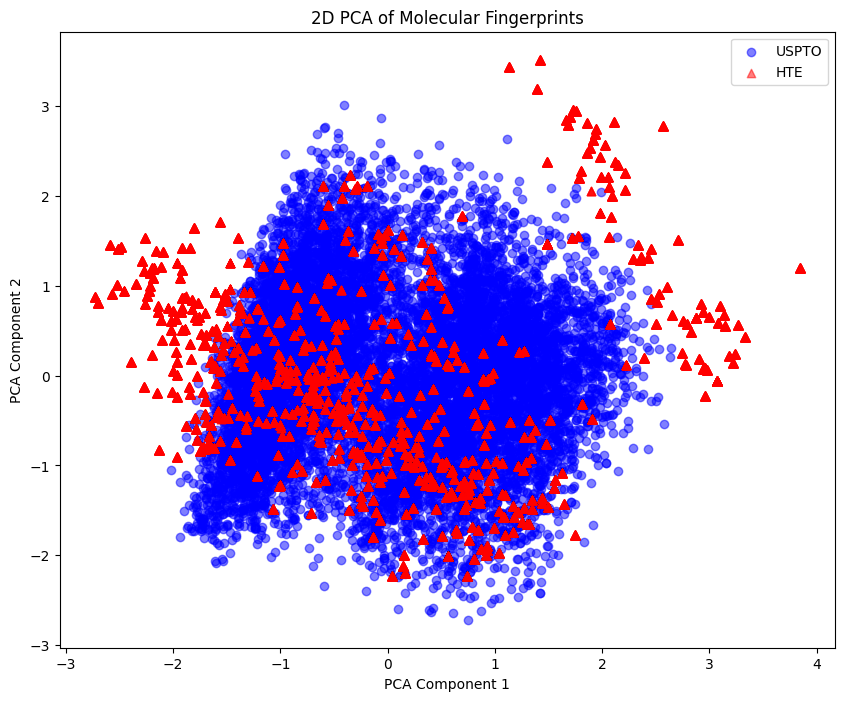

In [6]:
from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd

df = pd.read_csv("/data/USPTO.csv")
df2 = pd.read_csv("/data/HTE.csv")
smiles = list(df['product'])
smiles2 = list(df2['product_smiles'])

# Function to compute fingerprints
def compute_fingerprints(smiles_list):
    fingerprints = []
    for smi in smiles_list:
        mol = Chem.MolFromSmiles(smi)
        if mol is not None:
            fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024)
            fingerprints.append(fp)
    return fingerprints

# Compute fingerprints for both datasets
fingerprints = compute_fingerprints(smiles)
fingerprints2 = compute_fingerprints(smiles2)

# Convert fingerprints to NumPy arrays
fingerprints_np = np.array([np.array(fp) for fp in fingerprints])
fingerprints_np2 = np.array([np.array(fp) for fp in fingerprints2])

# Apply PCA
pca = PCA(n_components=2)
fingerprints_2d = pca.fit_transform(fingerprints_np)
pca2 = PCA(n_components=2)
fingerprints_2d_2 = pca2.fit_transform(fingerprints_np2)

# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(fingerprints_2d[:, 0], fingerprints_2d[:, 1], c='blue', alpha=0.5, label='USPTO')
plt.scatter(fingerprints_2d_2[:, 0], fingerprints_2d_2[:, 1], c='red',marker='^', alpha=0.5, label='HTE')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('2D PCA of Molecular Fingerprints')
plt.legend()
plt.show()


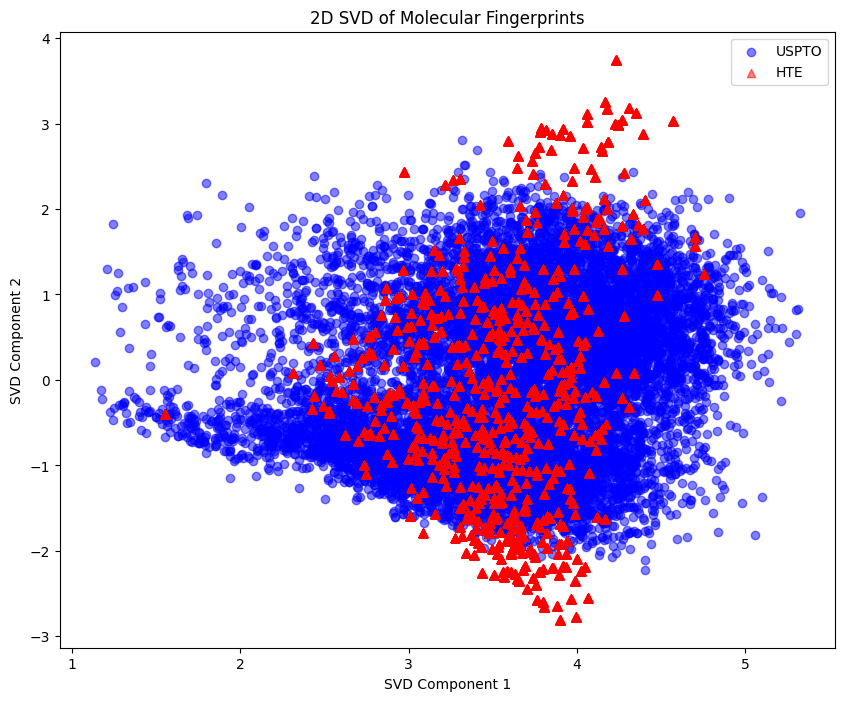

In [7]:
from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
import pandas as pd

df = pd.read_csv("/data/USPTO.csv")
df2 = pd.read_csv("/data/HTE.csv")
smiles = list(df['product'])
smiles2 = list(df2['product_smiles'])

# Function to compute fingerprints
def compute_fingerprints(smiles_list):
    fingerprints = []
    for smi in smiles_list:
        mol = Chem.MolFromSmiles(smi)
        if mol is not None:
            fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024)
            fingerprints.append(fp)
    return fingerprints

# Compute fingerprints for both datasets
fingerprints = compute_fingerprints(smiles)
fingerprints2 = compute_fingerprints(smiles2)

# Convert fingerprints to NumPy arrays
fingerprints_np = np.array([np.array(fp) for fp in fingerprints])
fingerprints_np2 = np.array([np.array(fp) for fp in fingerprints2])

# Apply SVD
svd = TruncatedSVD(n_components=2)
fingerprints_2d = svd.fit_transform(fingerprints_np)
svd1 = TruncatedSVD(n_components=2)
fingerprints_2d_2 = svd1.fit_transform(fingerprints_np2)

# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(fingerprints_2d[:, 0], fingerprints_2d[:, 1], c='blue', alpha=0.5, label='USPTO')
plt.scatter(fingerprints_2d_2[:, 0], fingerprints_2d_2[:, 1], c='red',marker='^', alpha=0.5, label='HTE')

plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')
plt.title('2D SVD of Molecular Fingerprints')
plt.legend()
plt.show()


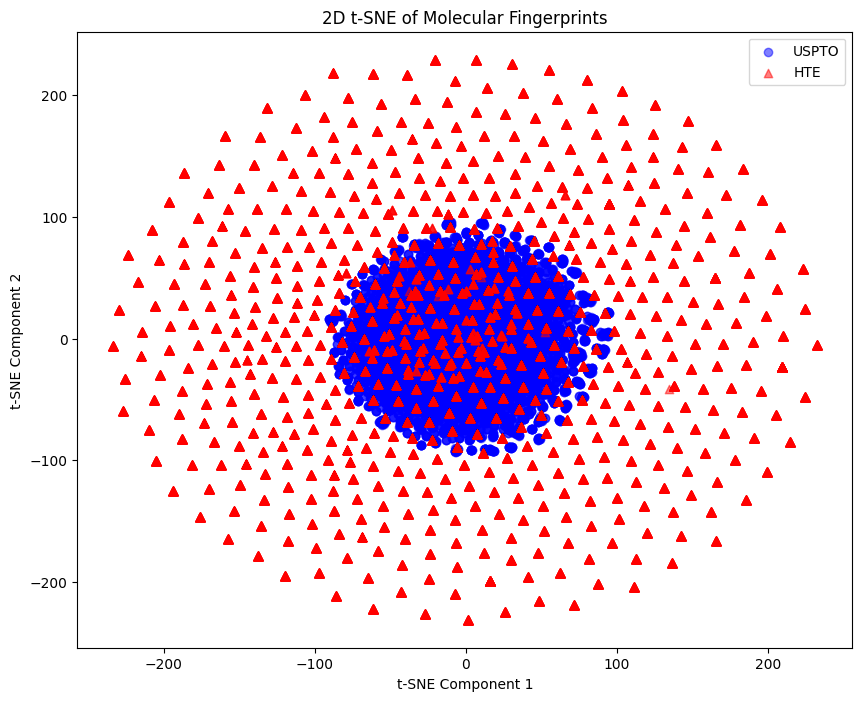

In [8]:
from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import pandas as pd

df = pd.read_csv("/data/USPTO.csv")
df2 = pd.read_csv("/data/HTE.csv")
smiles = list(df['product'])
smiles2 = list(df2['product_smiles'])

# Function to compute fingerprints
def compute_fingerprints(smiles_list):
    fingerprints = []
    for smi in smiles_list:
        mol = Chem.MolFromSmiles(smi)
        if mol is not None:
            fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024)
            fingerprints.append(fp)
    return fingerprints

# Compute fingerprints for both datasets
fingerprints = compute_fingerprints(smiles)
fingerprints2 = compute_fingerprints(smiles2)

# Convert fingerprints to NumPy arrays
fingerprints_np = np.array([np.array(fp) for fp in fingerprints])
fingerprints_np2 = np.array([np.array(fp) for fp in fingerprints2])

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)  # Set random_state for reproducibility
fingerprints_2d = tsne.fit_transform(fingerprints_np)
tsne1 = TSNE(n_components=2, random_state=42)
fingerprints_2d_2 = tsne1.fit_transform(fingerprints_np2)  # Apply t-SNE separately

# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(fingerprints_2d[:, 0], fingerprints_2d[:, 1], c='blue', alpha=0.5, label='USPTO')
plt.scatter(fingerprints_2d_2[:, 0], fingerprints_2d_2[:, 1], c='red',marker='^', alpha=0.5, label='HTE')

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('2D t-SNE of Molecular Fingerprints')
plt.legend()
plt.show()


/home/denghao/anaconda3/envs/danas/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/home/denghao/anaconda3/envs/danas/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:392: UserWarning: Exited at iteration 2000 with accuracies 
[6.63665240e-15 4.75002081e-06 3.03032822e-06 1.50989877e-05]
not reaching the requested tolerance 9.194016456604004e-06.
Use iteration 1977 instead with accuracy 
5.142680030908572e-06.

  _, diffusion_map = lobpcg(
/home/denghao/anaconda3/envs/danas/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:392: UserWarning: Exited postprocessing with accuracies 
[5.61731164e-15 4.70007863e-06 3.09291741e-06 1.27777470e-05]
not reaching the requested tolerance 9.194016456604004e-06.
  _, diffusion_map = lobpcg(


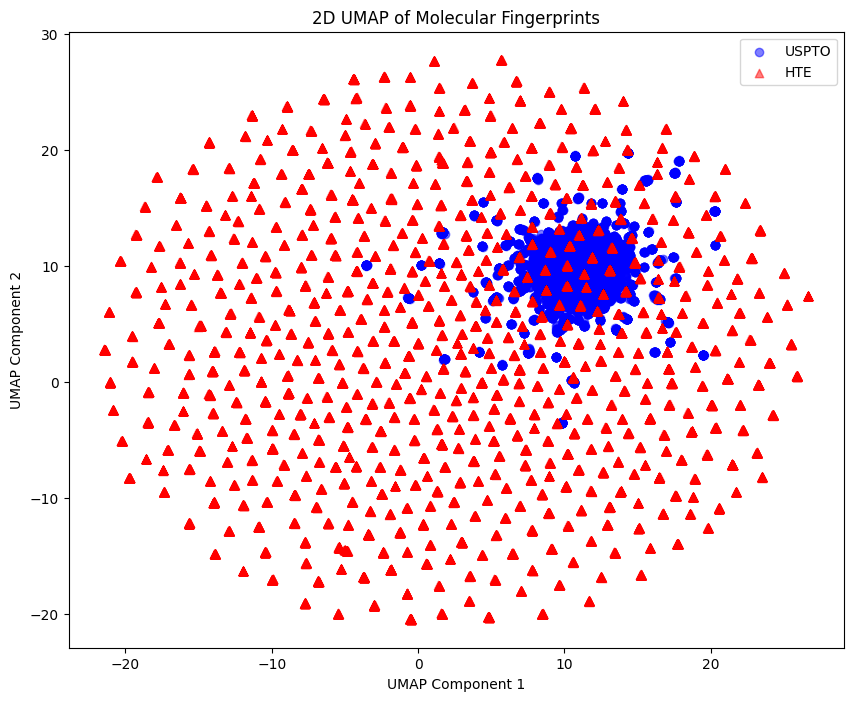

In [9]:
from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np
import matplotlib.pyplot as plt
import umap.umap_ as umap
import pandas as pd

df = pd.read_csv("/data/USPTO.csv")
df2 = pd.read_csv("/data/HTE.csv")
smiles = list(df['product'])
smiles2 = list(df2['product_smiles'])

# Function to compute fingerprints
def compute_fingerprints(smiles_list):
    fingerprints = []
    for smi in smiles_list:
        mol = Chem.MolFromSmiles(smi)
        if mol is not None:
            fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024)
            fingerprints.append(fp)
    return fingerprints

# Compute fingerprints for both datasets
fingerprints = compute_fingerprints(smiles)
fingerprints2 = compute_fingerprints(smiles2)

# Convert fingerprints to NumPy arrays
fingerprints_np = np.array([np.array(fp) for fp in fingerprints])
fingerprints_np2 = np.array([np.array(fp) for fp in fingerprints2])

# Apply UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)  # Set random_state for reproducibility
fingerprints_2d = umap_model.fit_transform(fingerprints_np)
umap_model1 = umap.UMAP(n_components=2, random_state=42)
fingerprints_2d_2 = umap_model.fit_transform(fingerprints_np2)  # Apply UMAP separately

# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(fingerprints_2d[:, 0], fingerprints_2d[:, 1], c='blue', alpha=0.5, label='USPTO')
plt.scatter(fingerprints_2d_2[:, 0], fingerprints_2d_2[:, 1], c='red',marker='^', alpha=0.5, label='HTE')

plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('2D UMAP of Molecular Fingerprints')
plt.legend()
plt.show()
